In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [80]:
# GCL from exercise 1

mod = 2**32 
multiplier = 1013904223
increment = 1664525
seed = int((97771 + 95637 + 99288 + 95605) / 4)

numsGen = {}
numsGen[0] = seed

def GCL(n):
    if (n in numsGen) :
        return numsGen[n]
    else:
        numsGen[n] = (multiplier*GCL(n-1) + increment) % mod
        return numsGen[n]

# Ejercicio 2

Proponer, y realizar, al menos 2 tests sobre el generador congruencial lineal implementado en el Ejercicio 1. Evaluar e interpretar los resultados de cada uno

## Gap Test

Siendo $U_{i}$ un número aleatorio con distribución uniforme en un rango $[0,1]$ y $0 \leq \alpha \leq \beta \leq 1$. Este test consiste en contar la cantidad de números aleatorios generados de forma consecutiva entre la generación de un número que pertenece al intervalo $[\alpha, \beta]$ y el próximo número generado que vuelve a pertenecer al intervalo.

Entendemos como gap al espacio entre dos apariciones consecutivas de números pertenecientes al intervalo $[\alpha, \beta]$.

La probabilidad teórica de apariciones de tamaño de gaps es:

$P(lengthGap = 0) = p = \beta - \alpha $

$P(lengthGap = 1) = p(1-p)$

$...$

$P(lengthGap = t) = p(1-p)^t$

La distribución de frecuencia teórica es:

$ P(lengthGap \leq t) = F(t) = p\sum_{n=1}^{t} (1-p)^{n} = 1-(1-p)^{t+1}$



Tomamos arbitrariamente:

$\alpha=0.3,\qquad  \beta=0.6$

y vamos analizar un total de 30 gaps.



In [86]:
# Generamos y contamos las observaciones del GCL del ejercicio 1b
# Luego calculamos la probabilidades de la geómetrica usada para el Gap Test
# Utilizaremos un intervalo de [0,3 ; 0,6]

random_probabilities = list()
for i in range(0,100000):
    x = GCL(i+1)
    random_probabilities.insert(i,x/mod)
experimental_results = np.zeros(len(random_probabilities))

# Counting gap occurrencies
gap_length = 0
for i in range(len(random_probabilities)):
    if(random_probabilities[i] >= 0.3 and random_probabilities[i] <= 0.6):
        experimental_results[gap_length] = experimental_results[gap_length] + 1
        gap_length = 0
    else:
        gap_length = gap_length + 1

number_of_experiments = sum(experimental_results)
# We take gaps with length up to 30
experimental_results = experimental_results[:30]

probabilities = np.zeros(len(experimental_results))
# Prob of each gap to be in the interval
probabilities[0] = 0.6 - 0.3
for i in range(1,len(experimental_results)):
    probabilities[i] = ((1 - probabilities[0]) ** i) * probabilities[0]
    
print("Número de experimentos : " + str(number_of_experiments))

Número de experimentos : 30174.0


Ahora realizamos el Test Estadístico $Chi^{2}$ para los datos obtenidos en el gap test:

$
D^{2} = \sum_{k=1}^{K-1}\frac {(N_{i} - np_{i})^{2}}{np_{i}}
$

Utilizaremos un nivel de significación del $5\%$, $\alpha = 0.05$, y una cantidad de diferentes valores k, $k=30$.

In [99]:
from scipy import stats as stats

# Now we should apply the chi squared test
obs = experimental_results
dof = len(obs) - 1
expected_values = probabilities * number_of_experiments
(s,p) = stats.chisquare(obs, f_exp = expected_values)


upper_limit = stats.chi2.ppf(0.95, df=dof)
print("Upper Limit: ", str(upper_limit))
print("Statistic = " + str(s))
print("P-value = " + str(p) + '\n')

print("Resultado: ")
if(s <= upper_limit):
    print("Acepto H0")
else:    
    print("Rechazo H0")


Upper Limit:  42.55696780429269
Statistic = 41.99125708607582
P-value = 0.056260889015939335

Resultado: 
Acepto H0


El resultado es que la hipótesis se acepta.

## Test Espectral de 2 Dimensiones

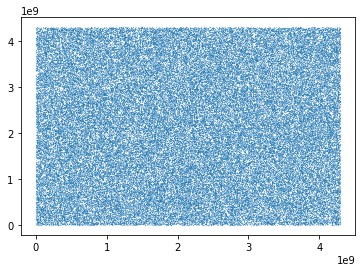

In [83]:
sample_length = 100000
values = list()

for i in range(0,sample_length):
    x = GCL(i+1)
    values.insert(i,x)

x_values = []
y_values = []
for i in range(1, sample_length):
    x_values.append(values[i])
    y_values.append(values[i-1])

plt.scatter(x_values, y_values, s = 0.02)
plt.show()

La imagen se ve bastante difusa, con lo cual esto es lo que nos interesa para un GCL, como vimos en clase. A continuación voy a hacer zoom en los ejes X e Y para ver si podemos encontrar algún patrón.

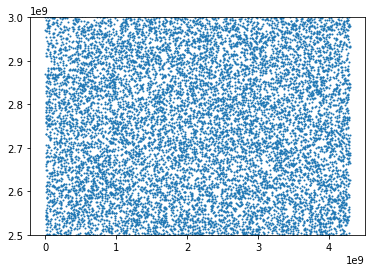

In [84]:
figzoom, axzoom = plt.subplots()

axzoom.scatter(x_values, y_values, s=1)

axzoom.set_ylim(2500000000, 3000000000)

plt.show()

Hacemos zoom ahora al eje X

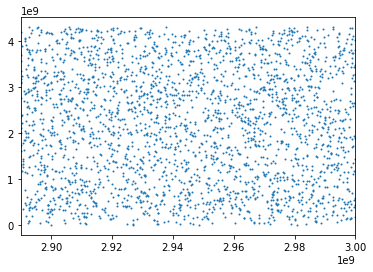

In [85]:
figzoom, axzoom = plt.subplots()

axzoom.scatter(x_values, y_values, s=1)

axzoom.set_xlim(2890000000, 3000000000)

plt.show()

En conclusión, no encontramos ningún patrón en nuestro test, y la imagen más macro se ve super difusa, por lo que no se observa ningún patrón que indique alguna deficiencia en el GNL.